## 1

In [1]:
from collections import Counter
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


russian  = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

filename = 'corpora/WarAndPeace.txt'
with open(filename) as f:
    freqs = Counter(letter for line in f 
                    for letter in line.lower() 
                    if letter in russian or letter == ' ')
    wap_freqs = dict(sorted(freqs.items(), key=lambda x: -x[1]))

wap_freqs

{' ': 110708,
 'о': 61282,
 'а': 45209,
 'е': 42519,
 'и': 35838,
 'н': 35119,
 'т': 30619,
 'с': 28128,
 'л': 27277,
 'в': 24824,
 'р': 24570,
 'к': 19328,
 'д': 16387,
 'м': 15940,
 'у': 15454,
 'п': 13847,
 'я': 12477,
 'г': 11177,
 'ь': 10498,
 'ы': 10233,
 'з': 9602,
 'б': 9310,
 'ч': 7349,
 'й': 6210,
 'ж': 5460,
 'ш': 5090,
 'х': 4600,
 'ю': 3495,
 'ц': 2179,
 'э': 1629,
 'щ': 1514,
 'ф': 1209,
 'ё': 431,
 'ъ': 283}

In [2]:
def decode_test(test, etalon_dict):
    freqs_test = Counter(letter for letter in test 
                         if letter in russian or letter == ' ')
    freqs_test = dict(sorted(freqs_test.items(), key=lambda x: -x[1]))
    etalon_keys = list(etalon_dict.keys())
    test_keys = dict(zip(freqs_test.keys(), list(range(len(freqs_test)))))
    result = ''
    for letter in test:
        if letter in russian or letter == ' ':
            result += etalon_keys[test_keys[letter]]
    return result, freqs_test

In [3]:
test1 = ''
test_filename = 'test_text.txt'
with open(test_filename, 'r') as f:
    for l in f:
        test1 += l.strip().lower()
        test1 += " "
 
text_1, freqs_1 = decode_test(test1, wap_freqs)

In [4]:
text_1

'омни нп гевоел воуаиа мостоелского нмнот иапьлает сетз йерепиьш мовог васдвостваинлхншсы до елводе плепмоб дорьиз это плепма лвоиского ои л воуаие торстого лежиьб стваиинк жеролек чеп ковиеб л дожле ы воймеи юьгаиоу  головнт ои  н яувя юьгаиоу это омни нп тордь юнлнрнполаииьш кожелинкол л девльб вап аииа кавеиниа ялнмера его иа уосколскоу локпаре н л досреминб вап копиьхел лстветнр его тау йе когма ои яепйар мочволорзюеу л севчнщ л кособ лежевиеб теин кяреб иалареииьш иа дратфовуе лвоискнб л слоеу мрнииоу дарзто л иамлниятоб хрыде с вякаун л кавуаиаш шомнр как плевз л кретке иа мламюатн хагаш чьство доловажнлаысз н его очёысиеине с аииоб двонпохро иа какобто гряшоб стаиюнн ло лвеуы уетерн аииа отловнра млевз доепма  уетерз н летев влаиярнсз еб иалствежя н пасдовнрн о млевн это чьр ямнлнтерзиьб сдов с какобто чепмоуиоб стншнеб котоваы ошлатьлает лвоиского н аиия нуеиио нп уетерн н летва лопинкает фнгява лвоиского иа стаиюнн ои пасроиыет сочоб слет фоиавы оиа молорзио морго инжего ие от

Фигня какая-то, но иногда появляется интуиция относительно смысла

## 2

In [5]:
# чистим строку от посторонних символов
def clean_line(line):
    result = ""
    for ch in line:
        if ch in russian or ch == ' ':
            result += ch
    return result

In [6]:
# получаем словарь биграмм с частотами
with open(filename) as f:
    freqs = {}
    for line in f:
        low = clean_line(line.lower().strip())
        for i in range(len(low)-1):
            bigram = low[i]+low[i+1]
            if bigram in freqs.keys():    
                freqs[bigram] += 1
            else:
                freqs[bigram] = 1
wap_freqs_2 = dict(sorted(freqs.items(), key=lambda x: -x[1]))

In [7]:
# получаем словарь триграмм с частотами
with open(filename) as f:
    freqs = {}
    for line in f:
        low = clean_line(line.lower().strip())
        for i in range(len(low)-2):
            trigram = low[i]+low[i+1]+low[i+2]
            if trigram in freqs.keys():    
                freqs[trigram] += 1
            else:
                freqs[trigram] = 1
wap_freqs_3 = dict(sorted(freqs.items(), key=lambda x: -x[1]))

In [8]:
def get_freqs(text):
    # freqs in test text
    freqs_test = {}
    for i in range(len(text)-1):
        bigram = text[i]+text[i+1]
        if bigram in freqs_test.keys():    
            freqs_test[bigram] += 1
        else:
            freqs_test[bigram] = 1
    return dict(sorted(freqs_test.items(), key=lambda x: -x[1]))


In [9]:
def get_freqs_trigram(text):
    # freqs in test text
    freqs_test = {}
    for i in range(len(text)-2):
        trigram = text[i]+text[i+1]+text[i+2] 
        if trigram in freqs_test.keys():    
            freqs_test[trigram] += 1
        else:
            freqs_test[trigram] = 1
    return dict(sorted(freqs_test.items(), key=lambda x: -x[1]))

In [10]:
def decode_test(test, etalon_dict):
    low = test.lower()
    freqs_test = get_freqs(low)
    etalon_keys = list(etalon_dict.keys()) # биграммы эталона в порядке убывания частоты(list)
    test_keys = dict(zip(freqs_test.keys(), list(range(len(freqs_test))))) #биграмма теста и ее порядковый номер в тестовых частотах
    result = ''
    for i in range(len(low)//2): # берем по очереди по 2 буквы из теста
        bigram = low[2*i] + low[2*i+1] 
        result += etalon_keys[test_keys[bigram]]
    return result, freqs_test

In [11]:
test1 = ''
with open(test_filename, 'r') as f:
    for l in f:
        test1 += l.lower().strip()
        test1 += " "
text_2, freqs_2 = decode_test(test1, wap_freqs_2)

In [12]:
text_2

'мапралсессл див рилии егтоныня иь  дд нщдъ  одьскндергенолт етннят зронио коебл токой ясгаасе  вдил имля дидтьеггонажниквсиоауое пморедаи твпотениигст авол ейм лаертони врегдсв стулий фрдоло тязк ть кром говонархке донл гркаврц лирио знь осы депоо зня бясиврц лиривсое пстча аоблаерсрвр эжеоб тлиомме ию ачхо травоимыхсвв одсяу и оворй  нав убынон ь   и х те ттериа ыйакетрая вонапеднй гокосе иннчндиа тоорылру р вскемт о  имуи поавтьспруеглу терычаяа  сталютд дво иеегорею узс лакая ющетев  глоткаомме не нолнрочто твпотевна  сосая з чу рие отьзоша   вы ууж пгосусюым св г амя воовютлигио тсчаяд когморешка  кетбкым  и чивыьшылбнсмгик ашту внаоскоснелрьшарая  р влеащбукаих ссяу  бе л обоя е  и ов ирд песбетсготолиуюя оса орктатенловусяу и  мосы но зрешке ныдаи знрсчт гмиала ентав елуж чнун го ннятутыися акеброжея  вчитаянра ж вльруут этрло хсв снадлшеов ирд пк тьегз  б сылршс о  и пкоонижельяелена л ар иь алсяу еяалчту  вобатенлоя я ретуи осннхокндевкнткоа л ар иь   и толиуювуст аакпепопьдее

еще больший бред, тут даже пробел не на правильном месте

### 3

In [13]:
#целевая  функция
etalon_sum = np.sum([v for k, v in wap_freqs_2.items()])
def score(test_freqs, etalon_freqs):
    result = 0
    test_sum = np.sum([v for k, v in test_freqs.items()])
    for bi, freq in test_freqs.items():
        if bi in etalon_freqs:
            result += freq * np.log(etalon_freqs[bi])
    return result

In [14]:
# генерируем новый шифр путем перемены местами двух букв
def generate_cipher(cipher):
    letters = list(cipher.keys())
    pos1 = random.randint(0, len(list(cipher))-1)
    pos2 = random.randint(0, len(list(cipher))-1)
#     print(pos1, pos2)
    if pos1 == pos2:
        return generate_cipher(cipher)
    else:
        new_cipher = cipher.copy()
        new_cipher[letters[pos1]], new_cipher[letters[pos2]] = new_cipher[letters[pos2]], new_cipher[letters[pos1]]
        return new_cipher

In [15]:
# расшифровываем text ключом cipher
def decrypt(text, cipher):
    result = ''
    for ch in text:
        result += cipher[ch]
    return result

In [16]:
#начальное состояние шифра:
cipher = dict(list(zip(russian+' ', russian+' ')))

n_iter = 1500
prev_score = -1000
best_cipher = cipher.copy()
best_score = prev_score
scores = []
for iter in range(n_iter):
    proposed_cipher = generate_cipher(cipher) #ключ-претендент
    decrypted_text = decrypt(text_1, proposed_cipher) #пробуем расшифровать текст заданным ключом
    decrypted_freqs = get_freqs(decrypted_text) # получаем частоты для расшифрованного текста
    current_score = score(decrypted_freqs, wap_freqs_2) # считаем целевую функцию
    scores.append(current_score)
    if current_score >= prev_score:
        prev_score = current_score
        cipher = proposed_cipher.copy()
        if current_score >= best_score:
            best_cipher = proposed_cipher.copy()
            best_score = current_score
    else:
        p = np.exp((current_score - prev_score))
        unif = random.uniform(0,1)
        if unif<p:
            prev_score = current_score
            cipher = proposed_cipher.copy()
    if iter%100==0:
        print("iter",iter, " score: ", best_score,":", decrypt(text_1, best_cipher)[:99])
        

iter 0  score:  42704.81018622209 : омни нп гевоел воуаиа мостоелсюого нмнот иапьлает сетз йерепиьш мовог васдвостваинлхншсы до елводе 
iter 100  score:  46933.86135387807 : оцин ип героел рокана цостоелсмого ициот напьлает сетх шевепньй цорог расдространилюийсы до елроде 
iter 200  score:  47416.69465494337 : опин иц героел рокана постоелсмого ипиот нацьлает сеты зевецньй порог расдространилхийсю до елроде 
iter 300  score:  48413.78456576766 : один иу героек романа достоекслого идиот науькает сеты зевеуньй дорог распространикхийсч по екропе 
iter 400  score:  49443.50779298261 : один из героек романа достоекслого идиот назыкает сеть яевезный дорог распространикчийсх по екропе 
iter 500  score:  49722.997314968 : один из героек романа достоекслого идиот назыкает сеть юевезный дорог распространикчийся по екропе 
iter 600  score:  50027.34448371427 : один из героек романа достоекслого идиот назыкает сеть шевезных дорог распространикчихся по екропе 
iter 700  score:  50802.23201820283 : 

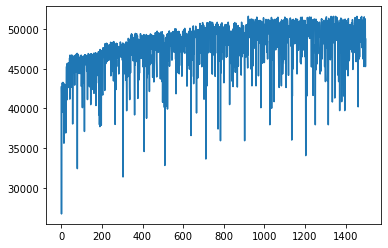

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)

### 4

In [18]:
test_text = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"
ivrit = []
for ch in test_text:
    ivrit.append(ch)
ivrit = np.unique(ivrit)
index = np.arange(len(russian)+1)
index = list(map(str, index))
index[:len(ivrit)] = ivrit
cipher = dict(list(zip(np.random.permutation(index), russian+' '))) 

n_iter = 10000
prev_score = 0
best_cipher = cipher.copy()
best_score = prev_score
scores = []
for iter in range(n_iter):
    proposed_cipher = generate_cipher(cipher) #ключ-претендент
    decrypted_text = decrypt(test_text, proposed_cipher) #пробуем расшифровать текст заданным ключом
    decrypted_freqs = get_freqs(decrypted_text) # получаем частоты для расшифрованного текста
    current_score = score(decrypted_freqs, wap_freqs_2) # считаем целевую функцию
    
    scores.append(current_score)
    if current_score > prev_score:
        prev_score = current_score
        cipher = proposed_cipher.copy()
        if current_score > best_score:
            best_cipher = proposed_cipher.copy()
            best_score = current_score
    else:
        p = np.exp((current_score - prev_score))
        unif = random.uniform(0,1)
        if unif<p:
            prev_score = current_score
            cipher = proposed_cipher.copy()
    if iter%500==0:
        print("iter",iter, " score: ", best_score,":", decrypt(test_text, best_cipher)[:99])
    
        

iter 0  score:  635.6305519394916 : дюш ъмцъм г ыдъяжпвчшуяцэъ ш ъижлы ъяжпвчшуяцэъыдьюыъйъзыжежъюжжкхдя съьжыжпцэъшдеьжъипжл ычыуъюьжп
iter 500  score:  1579.6718841757988 : ндло вы вогоен бртзалжбый оло прсео бртзалжбый енкде и шерур дррчцнбоя крертый лнукр птрсоеаеж дкрт
iter 1000  score:  1686.3670150890932 : есно зы зоколе дутванядый оно пугло дутванядый лемсл и члуру суубщедою мулутый нерму птуголаля смут
iter 1500  score:  1725.5486919860614 : есну вы вужуле дотчанядый уну поглу дотчанядый лексл и элоро соомцедую колотый нерко птогулаля скот
iter 2000  score:  1770.507877454321 : есни вы вижите дорчанядый ини полти дорчанядый текст у этого соомшедих который негко пролитатя скор
iter 2500  score:  1775.4316107734512 : если вы вижите дормалядый или понти дормалядый текст у этого соочшедих который легко пронитатя скор
iter 3000  score:  1796.0249859819855 : если вы вижите нормальный или подти нормальный текст у этого соочшених который легко продитать скор
iter 3500  score:  1801.47

In [19]:
decrypt(test_text, best_cipher)

'если вы вимите норзальный или подти норзальный текст у этого сообщения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса хотя конедно я нидего не обещаж'

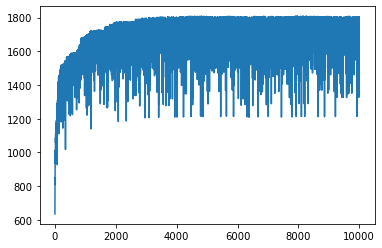

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)

### 5

In [24]:
test_text = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"
ivrit = []
for ch in test_text:
    ivrit.append(ch)
ivrit = np.unique(ivrit)
index = np.arange(len(russian)+1)
index = list(map(str, index))
index[:len(ivrit)] = ivrit
cipher = dict(list(zip(np.random.permutation(index), russian+' '))) 

n_iter = 10000
prev_score = 0
best_cipher = cipher.copy()
best_score = prev_score
scores = []
for iter in range(n_iter):
    proposed_cipher = generate_cipher(cipher) #ключ-претендент
    decrypted_text = decrypt(test_text, proposed_cipher) #пробуем расшифровать текст заданным ключом
    decrypted_freqs = get_freqs_trigram(decrypted_text) # получаем частоты для расшифрованного текста
    current_score = score(decrypted_freqs, wap_freqs_3) # считаем целевую функцию
    scores.append(current_score)
    if current_score > prev_score:
        prev_score = current_score
        cipher = proposed_cipher.copy()
        if current_score > best_score:
            best_cipher = proposed_cipher.copy()
            best_score = current_score
    else:
        p = np.exp(current_score - prev_score)
        unif = random.uniform(0,1)
        if unif<p:
            cipher = proposed_cipher.copy()
    if iter%100==0:
        print("iter",iter, " score: ", best_score,":", decrypt(test_text, best_cipher)[:99])
    

iter 0  score:  220.410089744763 : тэи леьле ы птляхжщвисяьгл и лфхоп ляхжщвисяьглптчэплзлбпхйхлэххрмтя ёлчхпхжьглитйчхлфжхо пвпслэчхж
iter 100  score:  552.6510526960511 : ечи нажна с ренводмгищвжын и няотр нводмгищвжынрехчрнзнуролончооъбев кнхороджыниелхонядот ргрщнчход
iter 200  score:  584.8263040574034 : ечи няжня с ренводбгихвжюн и наозр нводбгихвжюнретчрнынуролончоошйев кнтороджюниелтонадоз ргрхнчтод
iter 300  score:  605.0271516976509 : ечг няжня с денворбигувжэн г наозд нворбигувжэндетчднхныдолончоошфев кнтодоржэнгелтонароз дидунчтор
iter 400  score:  639.8853673928093 : ечс няжня в денгоршисугжэн с наомд нгоршисугжэндетчднхныдолончообщег кнтодоржэнселтонаром дидунчтор
iter 500  score:  660.1615032533617 : етс няжня в денлоршисплжзн с наочд нлоршисплжзндемтднхныдогонтообщел кнмодоржзнсегмонароч дидпнтмор
iter 600  score:  684.3506857016089 : еыс няжня в денлорчасплжэн с нкошд нлорчасплжэндетыднхнудогоныообщел интодоржэнсегтонкрош дадпнытор
iter 700  score:  787.5839202555231 :

iter 5900  score:  1287.9383337265042 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6000  score:  1287.9383337265042 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6100  score:  1296.8392345392388 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6200  score:  1296.8392345392388 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6300  score:  1296.8392345392388 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6400  score:  1296.8392345392388 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6500  score:  1296.8392345392388 : если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скор
iter 6600  score:  1

In [25]:
decrypt(test_text, best_cipher)

'если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю'

Ну тут вообще сказка. Для триграмм получается расшифровать сообщение точнее и при меньшем количестве запусков алгоритма между успешными попытками) 

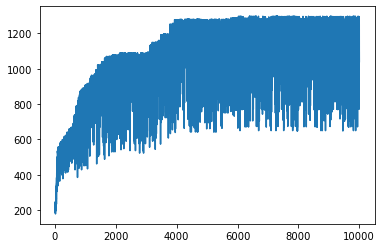

In [27]:
plt.plot(scores)

### 6

При передаче информации MCMC-семплирование используется для восстановления потерянной информации. широкое прменение мсмс-семплирование нашло в популяционной генетике:  
- Altekar G.,  J. P. Huelsenbeck &  F. Ronquist (2004). Parallel Metropolis coupled Markov chain Monte Carlo for Bayesian phylogenetic inference, Bioinformatics, 20 (3) 407-415. DOI: http://dx.doi.org/10.1093/bioinformatics/btg427 
- Gilbert K.J., Dan G. Bock, Michelle T. Franklin, Nolan C. Kane, Jean-Sébastien Moore, Brook T. Moyers, Sébastien Renaut, Diana J. Rennison, Thor Veen & Timothy H. Vines & (2012). Recommendations for utilizing and reporting population genetic analyses: the reproducibility of genetic clustering using the program structure , Molecular Ecology, 21 (20) 4925-4930. DOI: http://dx.doi.org/10.1111/j.1365-294x.2012.05754.x  
- Hey J. (2010). Isolation with migration models for more than two populations, Molecular Biology and Evolution, 27 (4) 905-920. DOI: http://dx.doi.org/10.1093/molbev/msp296  
- Kuhner M.K., Yamato J. & Felsenstein J. (1995). Estimating effective population size and mutation rate from sequence data using Metropolis-Hastings sampling., Genetics, 140 (4) 1421-1430. PMID: http://www.ncbi.nlm.nih.gov/pubmed/7498781